# TEE 실험 결과 분석

이 노트북은 CandyBox TEE(Trusted Execution Environment) 실험 결과를 분석합니다.

## 실험 매개변수
- **Server_Power**: 2, 4, 6 (cloud computation power)
- **Network**: 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130 (network bandwidth)  
- **Workload**: 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1 (target utilization)
- **Algorithms**: CO-DMO-CT, CO-DMO, Offloading, DVS, Baseline

## 분석 목표
- 알고리즘별 성능 비교
- 파워 소모량 분석 (CPU, Memory, Network)
- 워크로드 및 네트워크 대역폭 영향 평가
- 최적 구성 식별

In [180]:
import pandas as pd

# CSV 파일로 저장 후 불러오기
df = pd.read_csv("simulators/experiment_results.csv")  # data.csv에 위의 데이터를 저장해두세요
df.head()


,Server_Power,Network,Workload,Section,Power,Util,CPU_Power,Memory_Power,Network_Power,Offloading_Ratio,CPU_Frequency_1,CPU_Frequency_0.5,CPU_Frequency_0.25,CPU_Frequency_0.125
0,2,0,0.1,CO-DMO-CT,3.839225,0.943594,2.438620,1.400605,0.0,0.0000,4,8,22,46
1,2,0,0.1,CO-DMO,3.839225,0.943594,2.438620,1.400605,0.0,0.0000,4,8,22,46
2,2,0,0.1,Offloading,11.946165,0.068950,4.413046,7.533119,0.0,0.3625,80,0,0,0
3,2,0,0.1,DVS,9.559578,0.799169,2.025813,7.533765,0.0,0.0000,4,6,20,50
4,2,0,0.1,Baseline,14.720604,0.125000,7.187485,7.533119,0.0,0.0000,80,0,0,0


In [181]:
# 데이터 크기와 컬럼
print(df.shape)
print(df.columns)

# 데이터 타입과 결측치
print(df.info())

# 데이터 통계 요약
df.describe()


(2310, 14)
Index(['Server_Power', 'Network', 'Workload', 'Section', 'Power', 'Util',
       'CPU_Power', 'Memory_Power', 'Network_Power', 'Offloading_Ratio',
       'CPU_Frequency_1', 'CPU_Frequency_0.5', 'CPU_Frequency_0.25',
       'CPU_Frequency_0.125'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Server_Power         2310 non-null   int64  
 1   Network              2310 non-null   int64  
 2   Workload             2310 non-null   float64
 3   Section              2310 non-null   object 
 4   Power                2310 non-null   float64
 5   Util                 2310 non-null   float64
 6   CPU_Power            2310 non-null   float64
 7   Memory_Power         2310 non-null   float64
 8   Network_Power        2310 non-null   float64
 9   Offloading_Ratio     2310 non-null   float64
 10  CPU_Freq

,Server_Power,Network,Workload,Power,Util,CPU_Power,Memory_Power,Network_Power,Offloading_Ratio,CPU_Frequency_1,CPU_Frequency_0.5,CPU_Frequency_0.25,CPU_Frequency_0.125
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,4.000000,65.000000,0.600000,21.006639,0.607129,14.009401,5.415178,1.582061,0.386299,46.466234,10.270130,11.715584,11.548052
std,1.633347,40.320017,0.316296,17.107830,0.362143,16.286478,2.634840,2.915401,0.332591,32.429107,10.318267,11.979015,14.096373
min,2.000000,0.000000,0.100000,1.968366,0.009527,0.354504,0.885693,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,2.000000,30.000000,0.300000,8.043696,0.249653,2.025813,2.367559,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
50%,4.000000,65.000000,0.600000,14.720604,0.682449,5.657157,7.533286,0.483085,0.612500,53.000000,10.500000,5.000000,1.000000
75%,6.000000,100.000000,0.900000,32.654084,0.990090,25.120164,7.533921,1.898181,0.687500,80.000000,19.000000,24.000000,25.000000
max,6.000000,130.000000,1.100000,59.295500,1.487267,52.672106,7.533993,22.130169,0.775000,80.000000,34.000000,41.000000,50.000000


## Power 

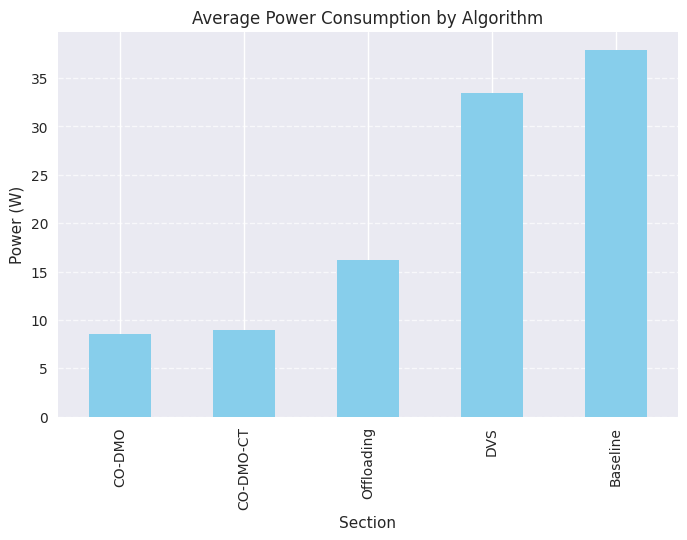

In [182]:
import matplotlib.pyplot as plt

avg_power = df.groupby("Section")["Power"].mean().sort_values()

plt.figure(figsize=(8,5))
avg_power.plot(kind="bar", color="skyblue")
plt.title("Average Power Consumption by Algorithm")
plt.ylabel("Power (W)")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


## Power 정규화

            Avg_Power (W)  Rel_to_Baseline (Baseline=1.0)
Section                                                  
CO-DMO             8.5745                          0.2263
CO-DMO-CT          8.9691                          0.2367
Offloading        16.1561                          0.4263
DVS               33.4357                          0.8823
Baseline          37.8979                          1.0000


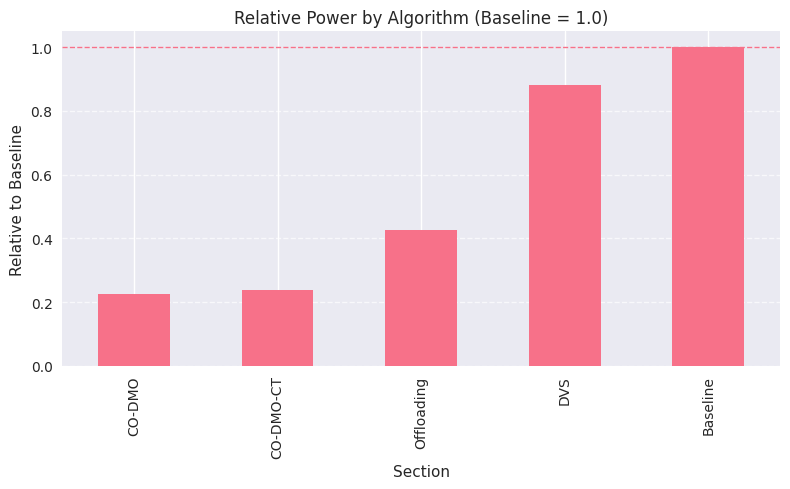

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Baseline=1.0 기준 정규화 표/그래프
avg_power = df.groupby("Section")["Power"].mean().sort_values()

if "Baseline" not in avg_power.index:
    raise ValueError("Section에 'Baseline'이 없습니다. 데이터/철자 확인 필요.")

baseline_val = float(avg_power.loc["Baseline"])
rel_power = (avg_power / baseline_val).sort_values()

# 표: 절대값과 Baseline 대비 비율
rel_table = pd.DataFrame({
    "Avg_Power (W)": avg_power,
    "Rel_to_Baseline (Baseline=1.0)": rel_power
})
print(rel_table.round(4).to_string())

# 그래프: Baseline=1.0 기준
plt.figure(figsize=(8,5))
rel_power.plot(kind="bar")
plt.title("Relative Power by Algorithm (Baseline = 1.0)")
plt.ylabel("Relative to Baseline")
plt.axhline(1.0, linestyle="--", linewidth=1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Network별 알고리즘 평균 Power

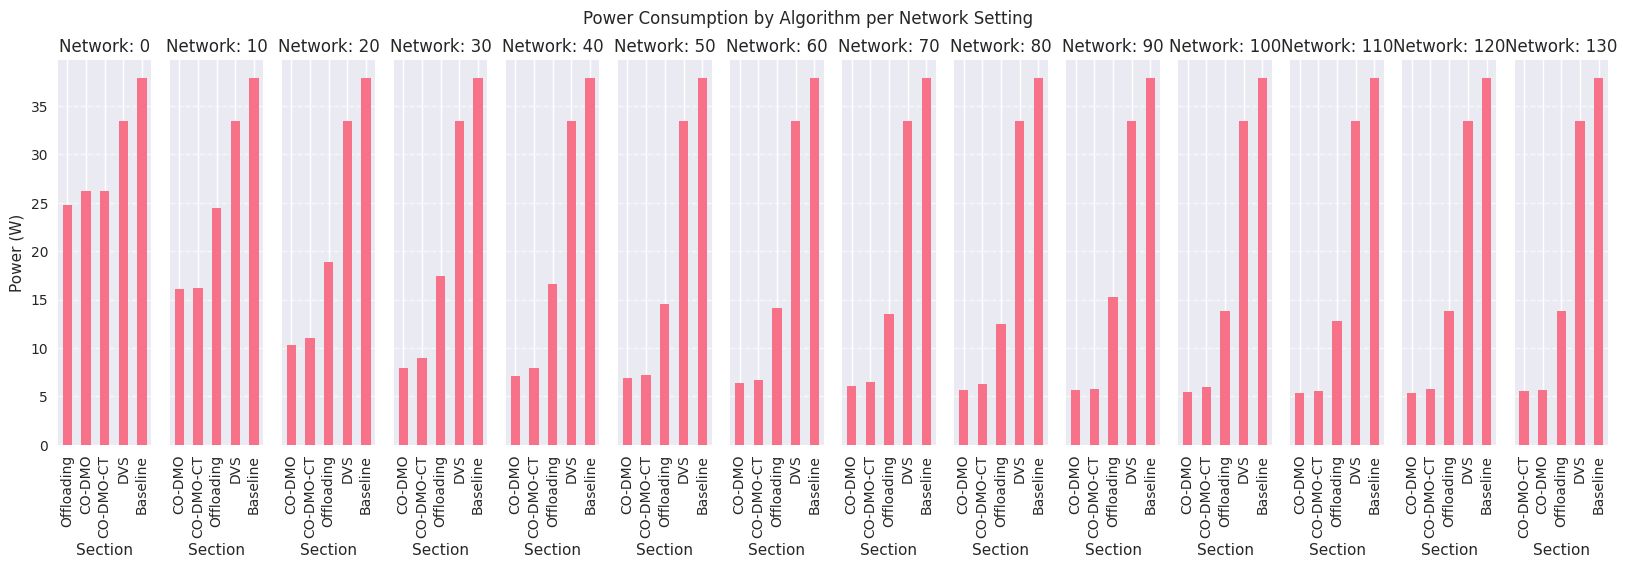

In [183]:
networks = sorted(df["Network"].unique())
fig, axes = plt.subplots(1, len(networks), figsize=(20,5), sharey=True)

for ax, net in zip(axes, networks):
    subset = df[df["Network"] == net]
    avg_power_net = subset.groupby("Section")["Power"].mean().sort_values()
    avg_power_net.plot(kind="bar", ax=ax)
    ax.set_title(f"Network: {net}")
    ax.set_ylabel("Power (W)")
    ax.grid(axis='y', linestyle="--", alpha=0.7)

plt.suptitle("Power Consumption by Algorithm per Network Setting")
plt.show()


## Workload별 알고리즘 평균 Power

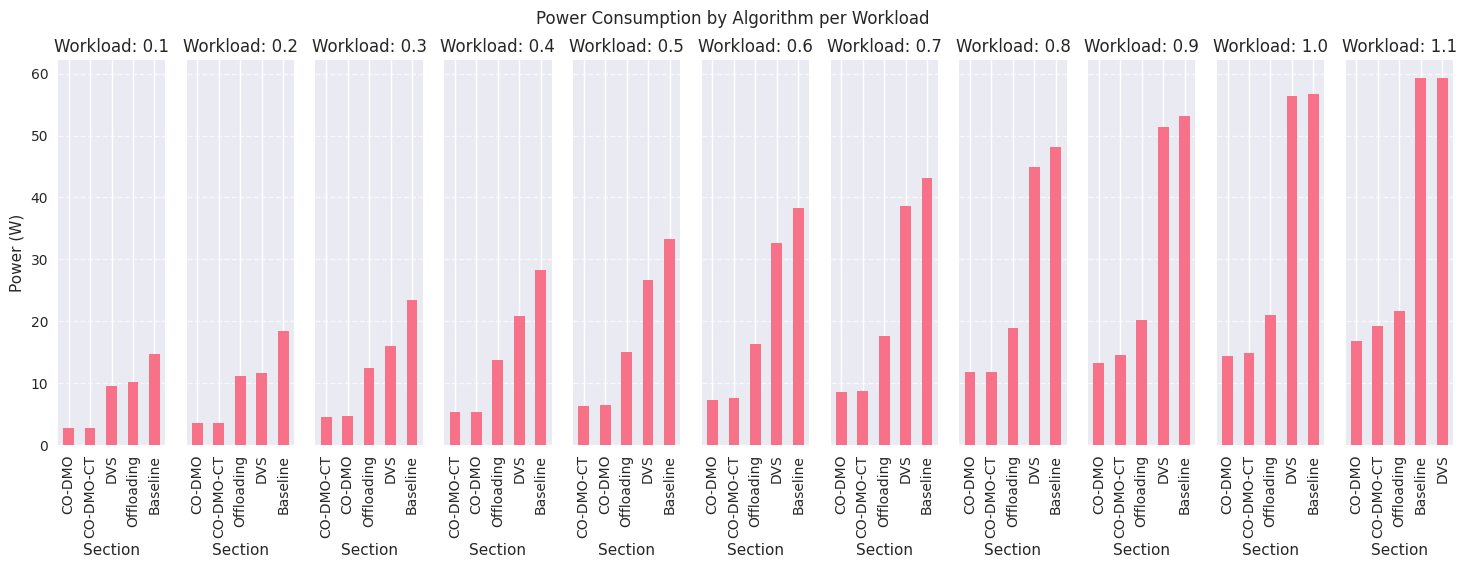

In [184]:
workloads = sorted(df["Workload"].unique())
fig, axes = plt.subplots(1, len(workloads), figsize=(18,5), sharey=True)

for ax, wl in zip(axes, workloads):
    subset = df[df["Workload"] == wl]
    avg_power_wl = subset.groupby("Section")["Power"].mean().sort_values()
    avg_power_wl.plot(kind="bar", ax=ax)
    ax.set_title(f"Workload: {wl}")
    ax.set_ylabel("Power (W)")
    ax.grid(axis='y', linestyle="--", alpha=0.7)

plt.suptitle("Power Consumption by Algorithm per Workload")
plt.show()


## Server Power에 따른 Power

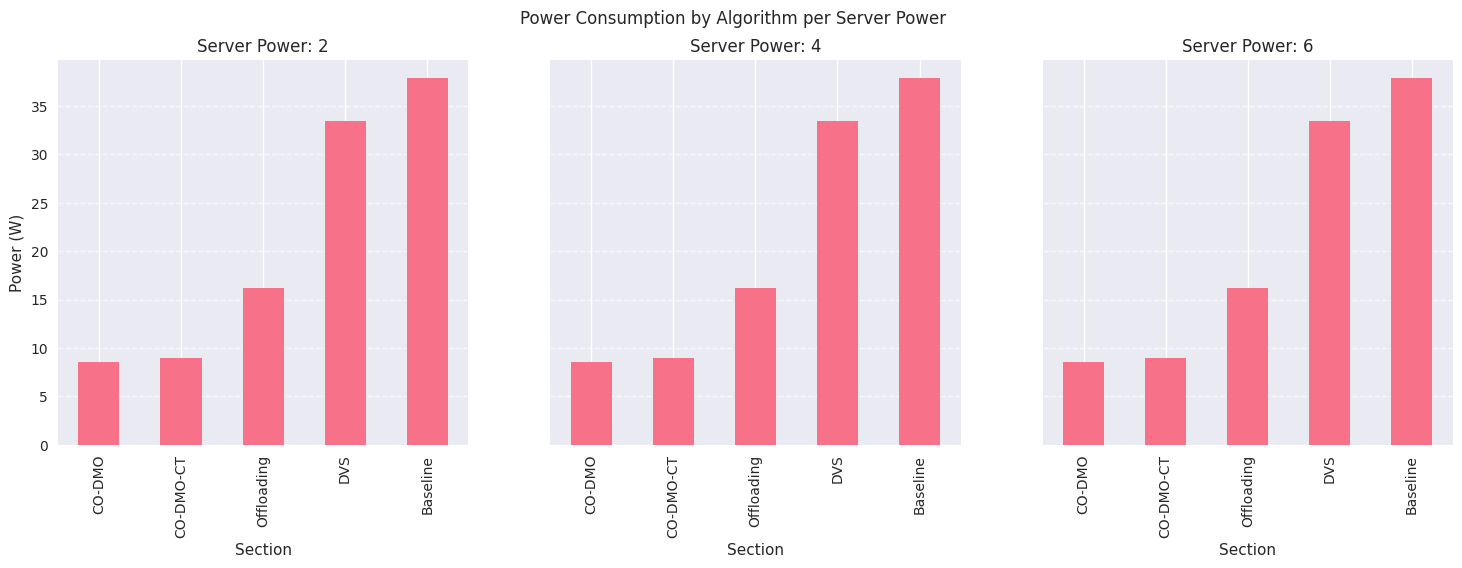

In [185]:
server_powers = sorted(df["Server_Power"].unique())
fig, axes = plt.subplots(1, len(server_powers), figsize=(18,5), sharey=True)

for ax, sp in zip(axes, server_powers):
    subset = df[df["Server_Power"] == sp]
    avg_power_sp = subset.groupby("Section")["Power"].mean().sort_values()
    avg_power_sp.plot(kind="bar", ax=ax)
    ax.set_title(f"Server Power: {sp}")
    ax.set_ylabel("Power (W)")
    ax.grid(axis='y', linestyle="--", alpha=0.7)

plt.suptitle("Power Consumption by Algorithm per Server Power")
plt.show()


## Network에 따른 Offloading Ratio

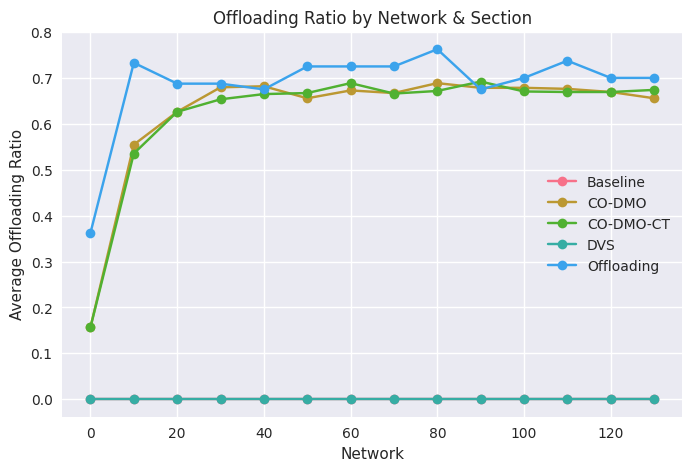

In [186]:
offload_mean = df.groupby(["Network", "Section"])["Offloading_Ratio"].mean().reset_index()

plt.figure(figsize=(8, 5))
for sec in offload_mean["Section"].unique():
    subset = offload_mean[offload_mean["Section"] == sec]
    plt.plot(subset["Network"], subset["Offloading_Ratio"], marker='o', label=sec)

plt.xlabel("Network")
plt.ylabel("Average Offloading Ratio")
plt.title("Offloading Ratio by Network & Section")
plt.legend()
plt.grid(True)
plt.show()


## Network별 Power 분석

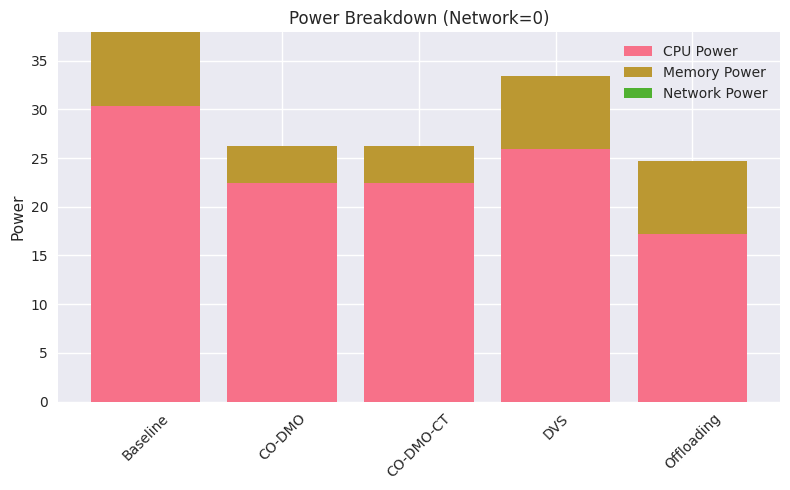

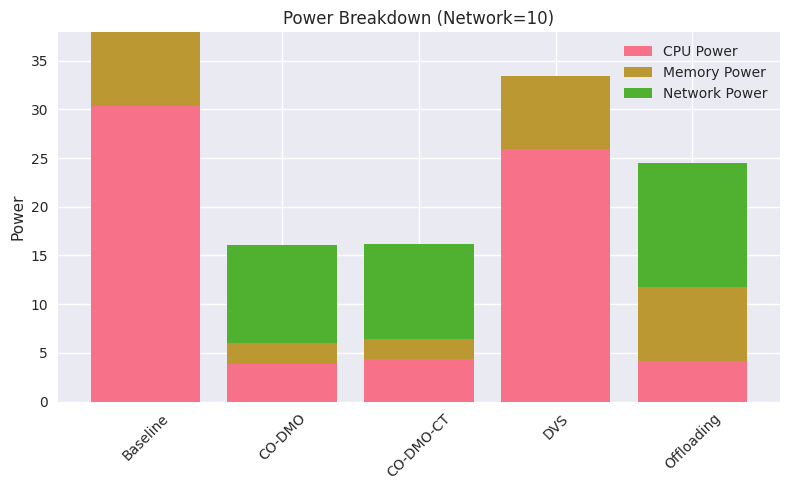

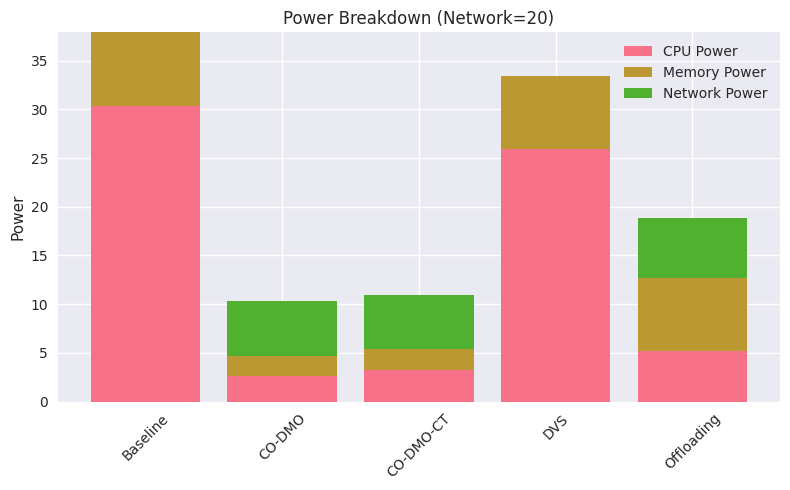

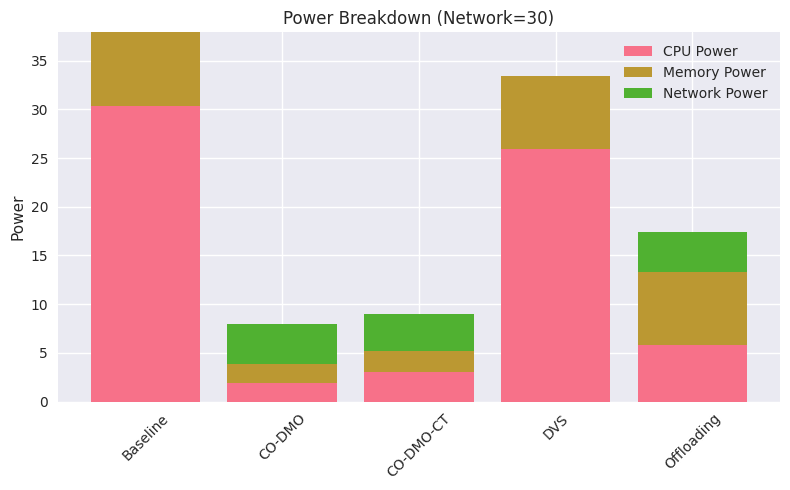

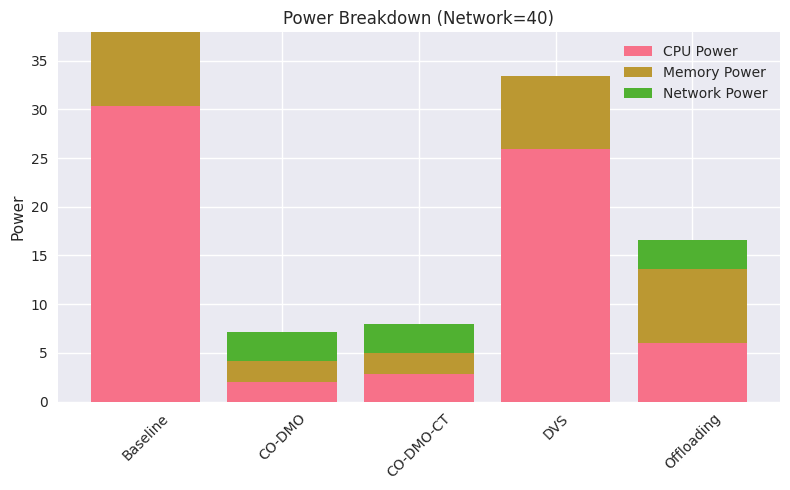

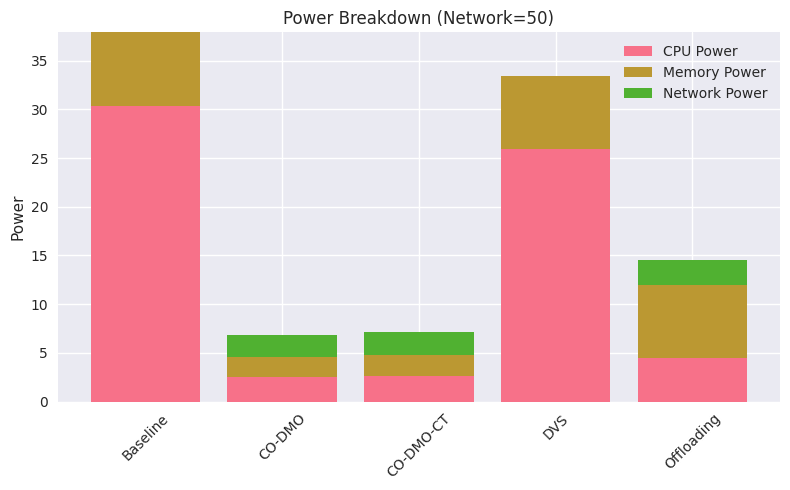

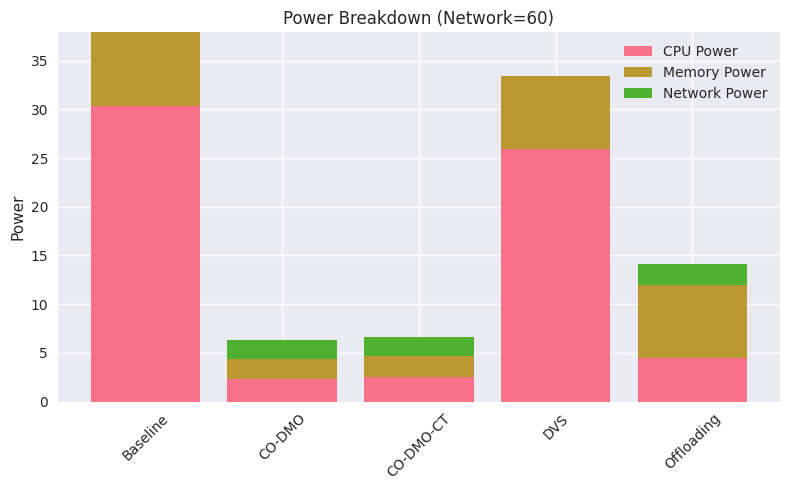

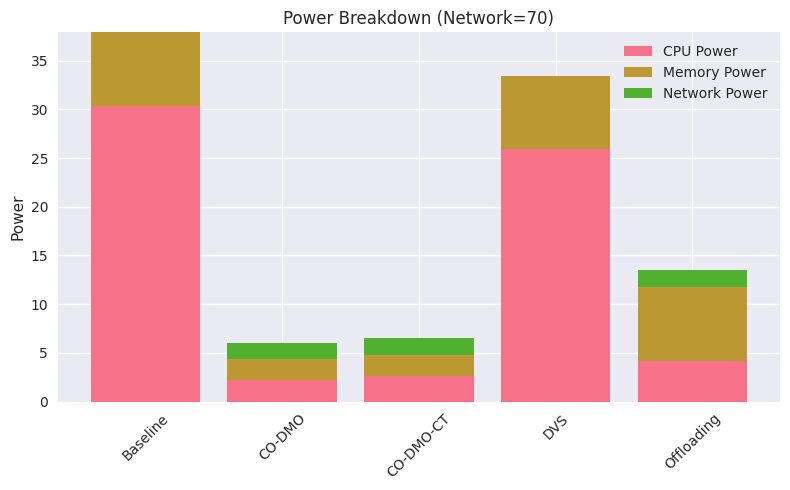

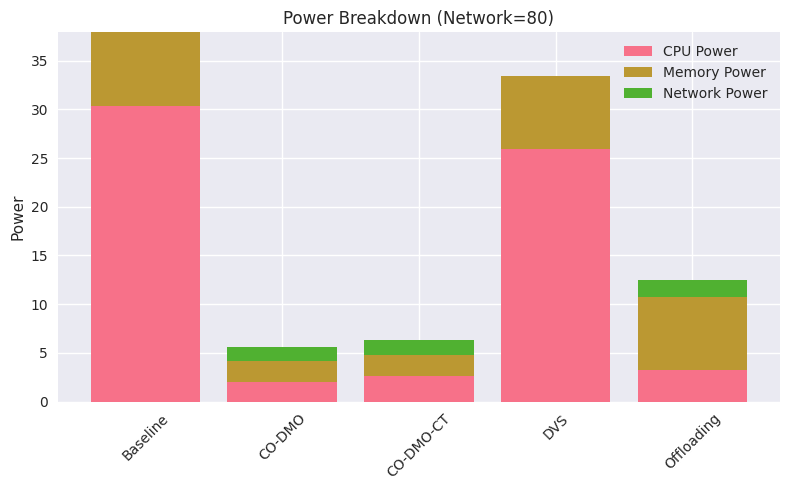

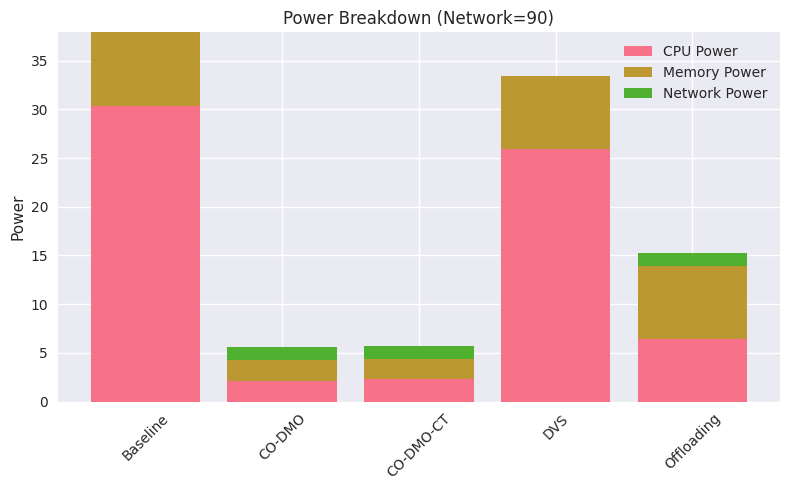

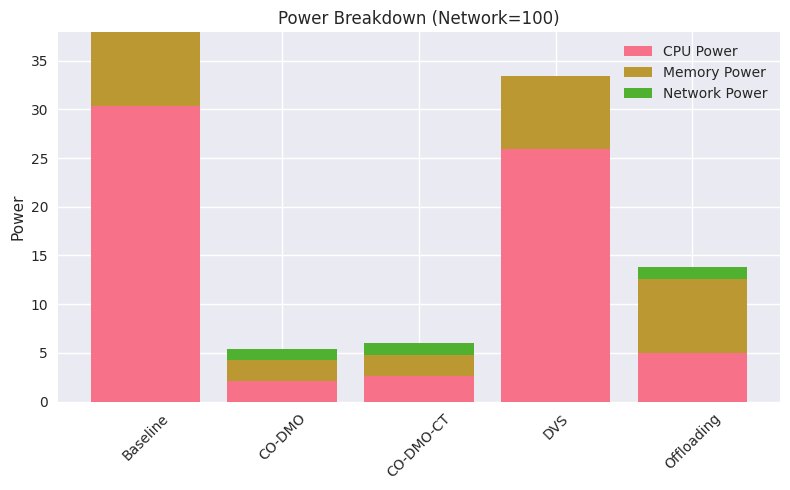

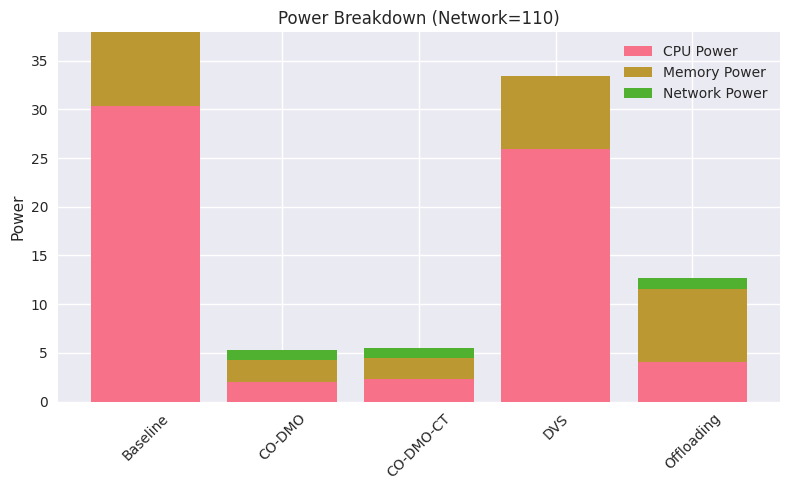

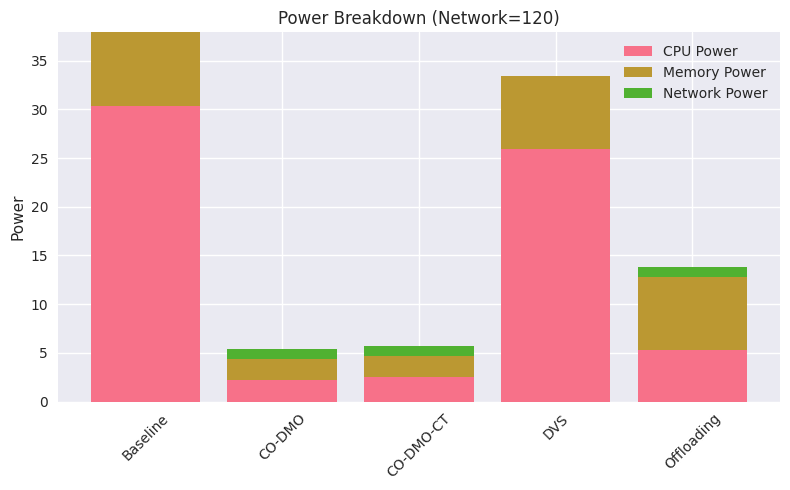

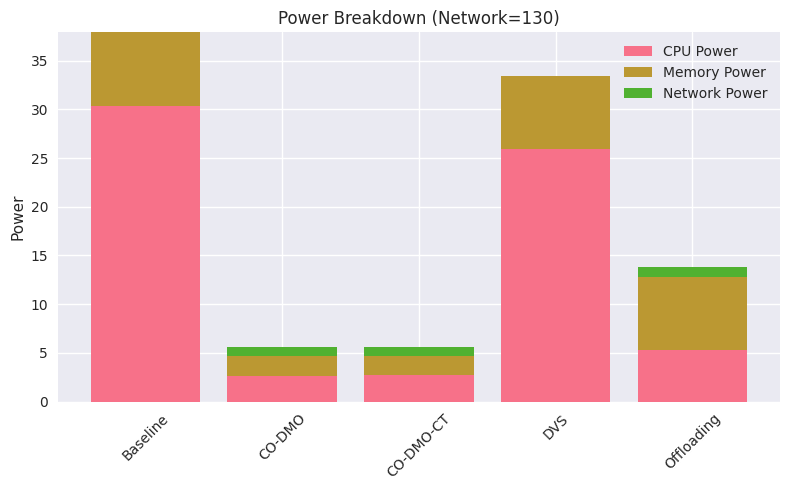

In [187]:
power_mean = df.groupby(["Network", "Section"])[["CPU_Power", "Memory_Power", "Network_Power"]].mean().reset_index()

networks = sorted(power_mean["Network"].unique())
sections = power_mean["Section"].unique()

for net in networks:
    subset = power_mean[power_mean["Network"] == net]
    plt.figure(figsize=(8, 5))
    plt.bar(subset["Section"], subset["CPU_Power"], label="CPU Power")
    plt.bar(subset["Section"], subset["Memory_Power"], bottom=subset["CPU_Power"], label="Memory Power")
    bottom_sum = subset["CPU_Power"] + subset["Memory_Power"]
    plt.bar(subset["Section"], subset["Network_Power"], bottom=bottom_sum, label="Network Power")

    plt.ylabel("Power")
    plt.title(f"Power Breakdown (Network={net})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

## CO-DMO-CT vs CO-DMO  Utilization for (worklaod, network) - 전체 

     Workload  Network     Section      Util
0         0.1        0    Baseline  0.125000
1         0.1        0      CO-DMO  0.943594
2         0.1        0   CO-DMO-CT  0.943594
3         0.1        0         DVS  0.799169
4         0.1        0  Offloading  0.068950
..        ...      ...         ...       ...
765       1.1      130    Baseline  1.024981
766       1.1      130      CO-DMO  0.953792
767       1.1      130   CO-DMO-CT  0.723391
768       1.1      130         DVS  1.024981
769       1.1      130  Offloading  0.150235

[770 rows x 4 columns]
Section             CO-DMO  CO-DMO-CT  Diff(COD-MO-CT - COD-MO)
Workload Network                                               
0.1      0        0.943594   0.943594                  0.000000
         10       0.423798   0.506895                  0.083097
         20       0.256882   0.325234                  0.068352
         30       0.157472   0.289390                  0.131918
         40       0.266226   0.264174               

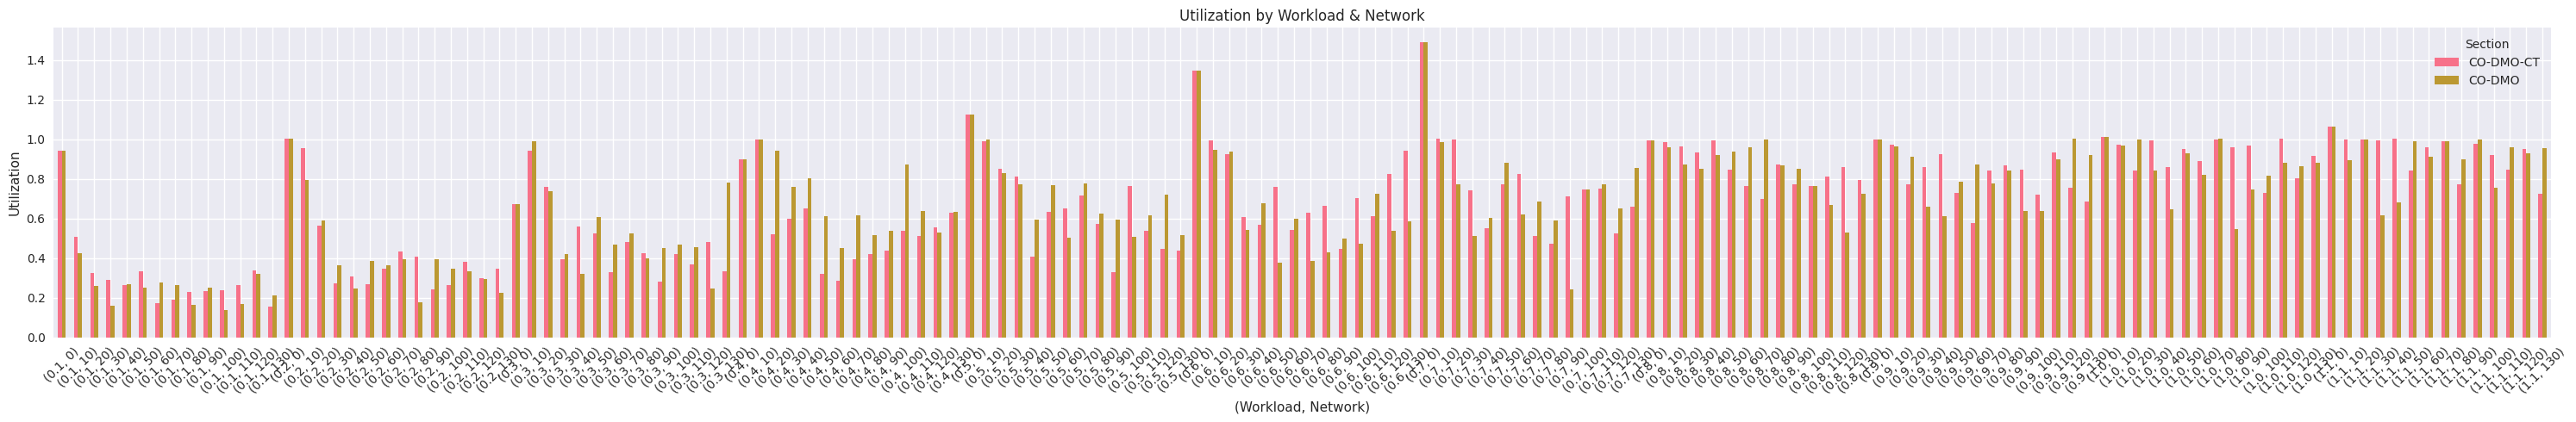

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Workload & Network별 Util 평균
util_wl_net = (
    df.groupby(["Workload", "Network", "Section"])["Util"]
      .mean()
      .reset_index()
      .sort_values(["Workload", "Network"])
)

print(util_wl_net)

# COD-MO-DT vs COD-MO만 필터링해서 비교
cod_util_wl_net = util_wl_net[util_wl_net["Section"].isin(["CO-DMO-CT", "CO-DMO"])]

# 피벗해서 비교 보기
pivot_cod = cod_util_wl_net.pivot_table(index=["Workload", "Network"], columns="Section", values="Util")
pivot_cod["Diff(COD-MO-CT - COD-MO)"] = pivot_cod["CO-DMO-CT"] - pivot_cod["CO-DMO"]

print(pivot_cod)

# 그래프: Workload/Network별 COD-MO-DT vs COD-MO Util
pivot_cod[["CO-DMO-CT", "CO-DMO"]].plot(kind="bar", figsize=(30,5))
plt.title("Utilization by Workload & Network")
plt.ylabel("Utilization")
plt.xlabel("(Workload, Network)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## CO-DMO-CT vs CO-DMO  Utilization for (worklaod, network) - 일부

     Workload  Network     Section      Util
0         0.1        0    Baseline  0.125000
1         0.1        0      CO-DMO  0.943594
2         0.1        0   CO-DMO-CT  0.943594
3         0.1        0         DVS  0.799169
4         0.1        0  Offloading  0.068950
..        ...      ...         ...       ...
120       1.0      120    Baseline  0.974981
121       1.0      120      CO-DMO  0.862875
122       1.0      120   CO-DMO-CT  0.803199
123       1.0      120         DVS  0.999742
124       1.0      120  Offloading  0.142908

[125 rows x 4 columns]
Section           CO-DMO-CT    CO-DMO  Diff(COD-MO-CT - COD-MO)
Workload Network                                               
0.1      0         0.943594  0.943594                  0.000000
         30        0.289390  0.157472                  0.131918
         60        0.170334  0.276931                 -0.106597
         90        0.233658  0.250880                 -0.017222
         120       0.335954  0.318746               

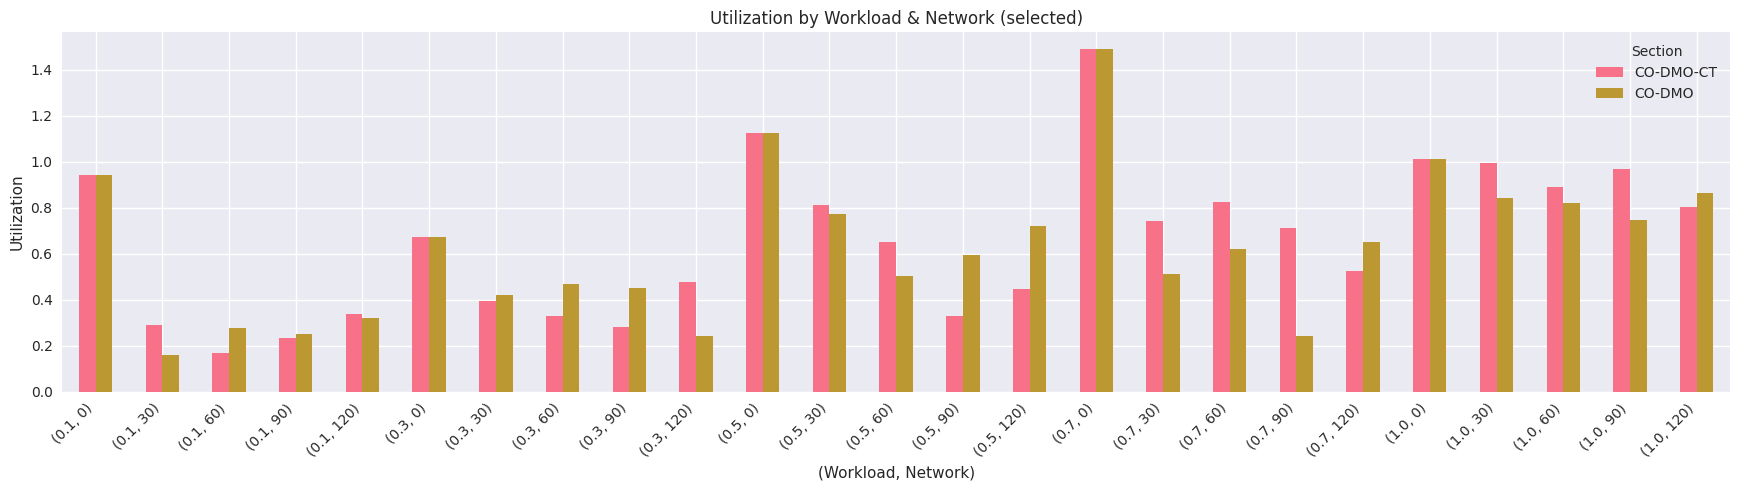

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# === 0) 여기만 직접 고르세요 ===
WORKLOAD_PICK = [0.1, 0.3, 0.5, 0.7, 1.0]     
NETWORK_PICK  = [0, 30, 60, 90, 120]     
SERVER_PICK   = [2]                 

# === A) 먼저 선택값으로 DF를 필터 ===
mask = (
    df["Workload"].isin(WORKLOAD_PICK) &
    df["Network"].isin(NETWORK_PICK)
)
if "Server_Power" in df.columns and SERVER_PICK is not None:
    mask &= df["Server_Power"].isin(SERVER_PICK)

df_sel = df[mask].copy()
if df_sel.empty:
    raise ValueError("선택한 WORKLOAD/NETWORK(/SERVER) 조합에 해당하는 데이터가 없습니다.")

# === B) Workload & Network별 Util 평균 (모든 Section 포함) ===
util_wl_net = (
    df_sel.groupby(["Workload", "Network", "Section"])["Util"]
      .mean()
      .reset_index()
      .sort_values(["Workload", "Network"])
)

print(util_wl_net)

# === C) COD-MO-CT vs COD-MO만 필터링해서 비교 ===
target_sections = ["CO-DMO-CT", "CO-DMO"]
cod_util_wl_net = util_wl_net[util_wl_net["Section"].isin(target_sections)]

# === D) 피벗 및 Diff 계산 (없는 섹션은 NaN으로 둠) ===
pivot_cod = (
    cod_util_wl_net
    .pivot_table(index=["Workload", "Network"], columns="Section", values="Util")
    .reindex(columns=target_sections)                 # 두 컬럼 순서 고정
    .sort_index(level=["Workload", "Network"])
)
pivot_cod["Diff(COD-MO-CT - COD-MO)"] = pivot_cod["CO-DMO-CT"] - pivot_cod["CO-DMO"]

print(pivot_cod)

# === E) 그래프: 선택된 (Workload, Network)만 표시 ===
ax = pivot_cod[target_sections].plot(kind="bar", figsize=(max(12, len(pivot_cod)*0.7), 5))
ax.set_title("Utilization by Workload & Network (selected)")
ax.set_ylabel("Utilization")
ax.set_xlabel("(Workload, Network)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


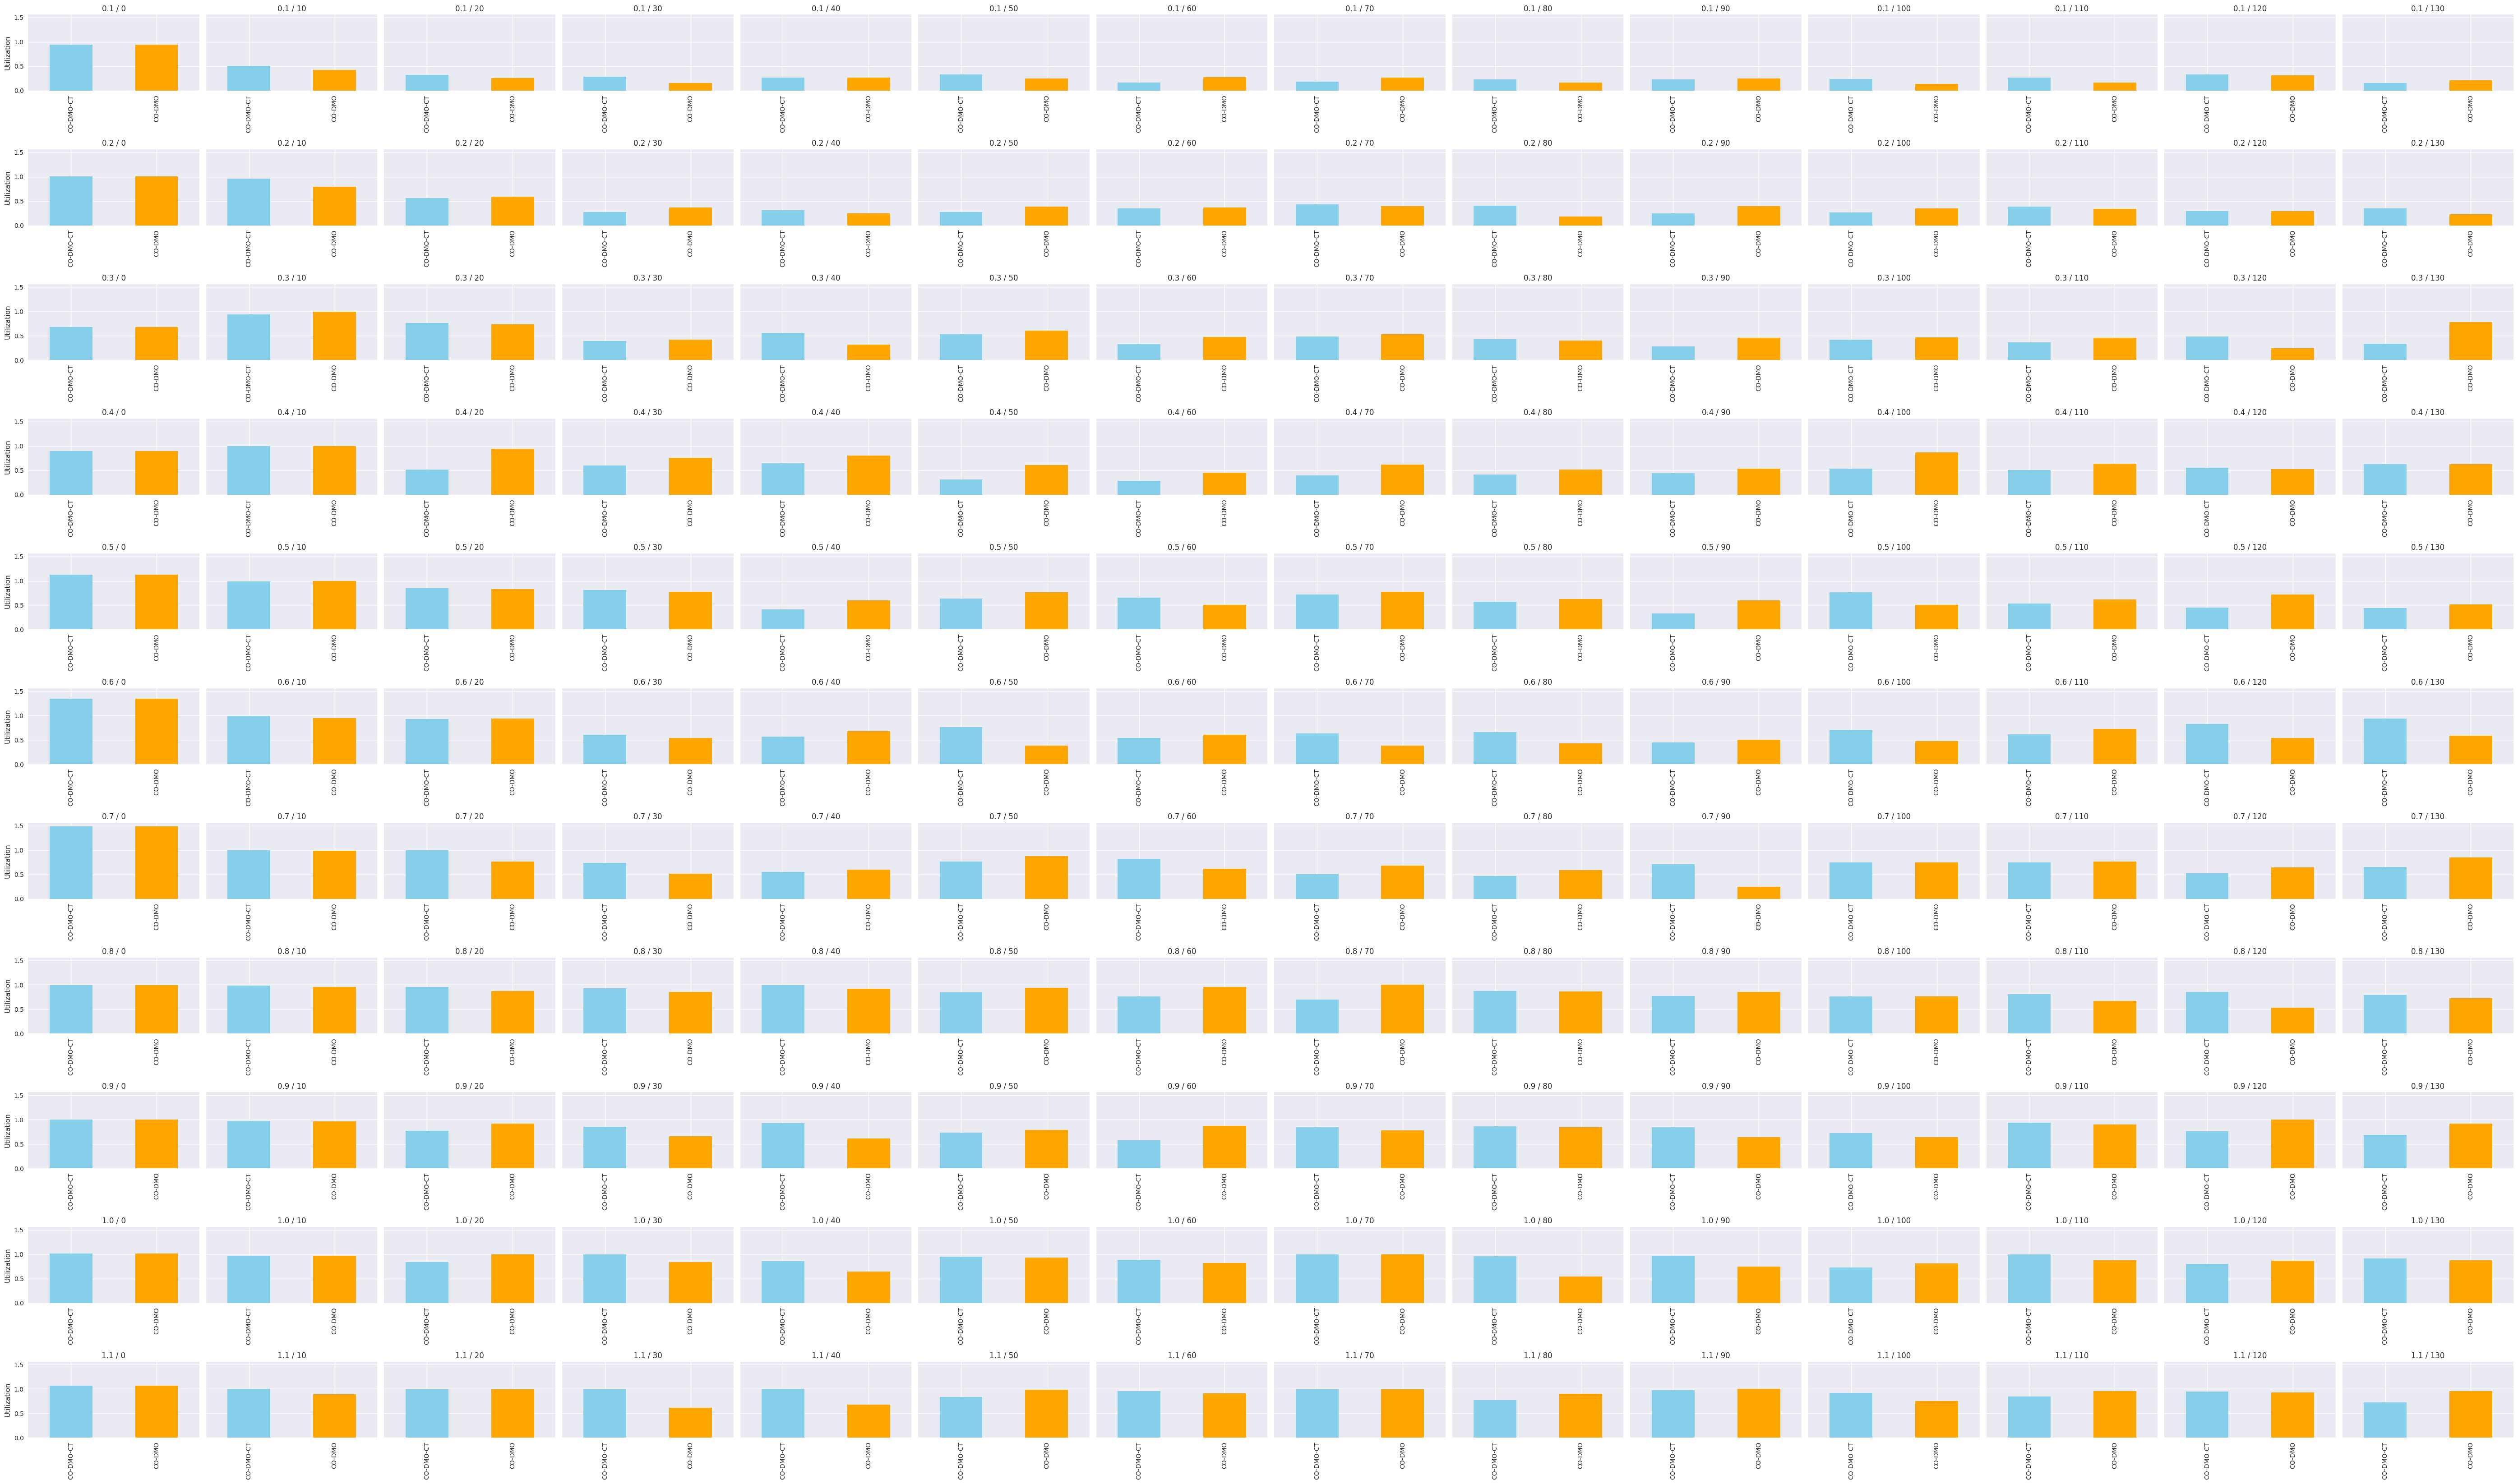

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Workload & Network별 평균 Util 계산
util_wl_net = (
    df.groupby(["Workload", "Network", "Section"])["Util"]
      .mean()
      .reset_index()
      .sort_values(["Workload", "Network"])
)

# COD-MO-DT vs COD-MO 필터
cod_util_wl_net = util_wl_net[util_wl_net["Section"].isin(["CO-DMO-CT", "CO-DMO"])]

# Workload, Network 목록
workloads = cod_util_wl_net["Workload"].unique()
networks = cod_util_wl_net["Network"].unique()

# Subplot 생성 (행: Workload, 열: Network)
fig, axes = plt.subplots(len(workloads), len(networks), figsize=(len(networks)*4, len(workloads)*3), sharey=True)

# axes가 2D 배열이 아닌 경우 대비
if len(workloads) == 1 and len(networks) == 1:
    axes = [[axes]]
elif len(workloads) == 1:
    axes = [axes]
elif len(networks) == 1:
    axes = [[ax] for ax in axes]

# 각 Workload/Network 조합에 대해 그래프 그리기
for i, wl in enumerate(workloads):
    for j, net in enumerate(networks):
        ax = axes[i][j]
        subset = cod_util_wl_net[(cod_util_wl_net["Workload"] == wl) & 
                                 (cod_util_wl_net["Network"] == net)]
        if not subset.empty:
            subset = subset.set_index("Section").loc[["CO-DMO-CT", "CO-DMO"]]  # 순서 고정
            subset["Util"].plot(kind="bar", ax=ax, color=["skyblue", "orange"])
        
        ax.set_title(f"{wl} / {net}")
        ax.set_xlabel("")
        if j == 0:
            ax.set_ylabel("Utilization")
        else:
            ax.set_ylabel("")

plt.tight_layout()
plt.show()


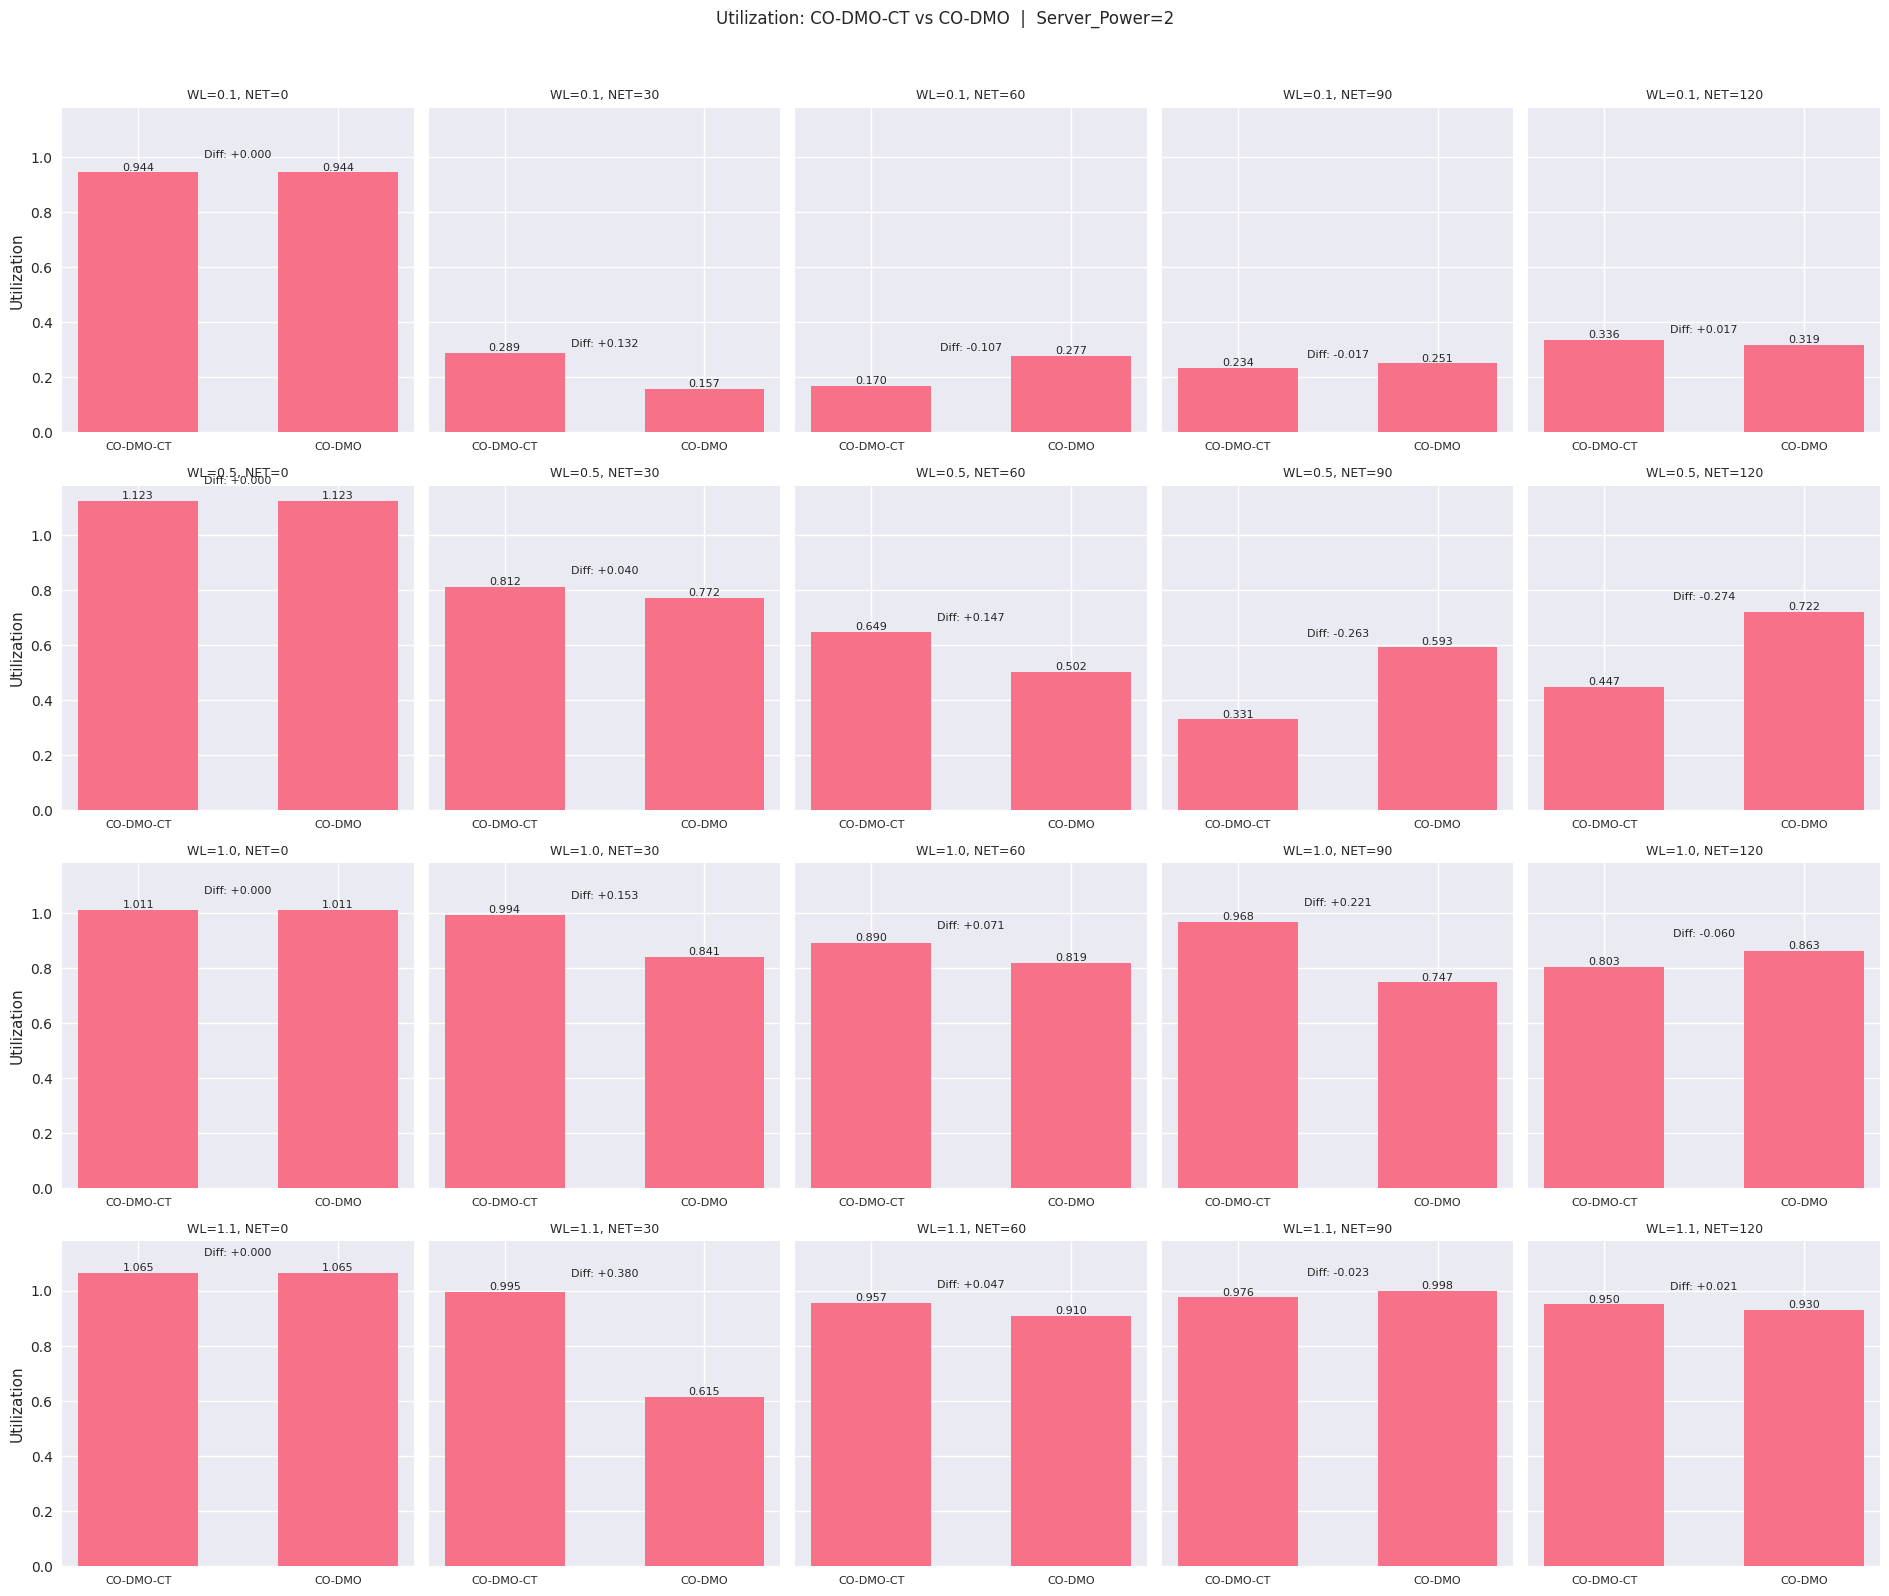

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== 1) 여기만 고치면 됨: 직접 고른 값들 ====
WORKLOAD_PICK = [0.1, 0.5, 1.0, 1.1]           # 예시
NETWORK_PICK  = [0, 30, 60, 90, 120]      # 예시
SERVER_PICK   = [2]                        # 예시 (여러 개면 서버별로 여러 장 출력)

TARGET_SECTIONS = ["CO-DMO-CT", "CO-DMO"]

# ==== 2) 필터 ====
need_server = "Server_Power" in df.columns
mask = (
    df["Workload"].isin(WORKLOAD_PICK) &
    df["Network"].isin(NETWORK_PICK) &
    (df["Section"].isin(TARGET_SECTIONS))
)
if need_server:
    mask &= df["Server_Power"].isin(SERVER_PICK)

df_sel = df[mask].copy()
if df_sel.empty:
    raise ValueError("선택한 값 조합에 해당하는 데이터가 없습니다. PICK 배열을 확인하세요.")

# ==== 3) 평균 집계 ====
by_cols = ["Workload", "Network", "Section"]
if need_server:
    by_cols = ["Server_Power"] + by_cols

util_sel = (
    df_sel.groupby(by_cols, as_index=False)["Util"]
          .mean()
)

# ==== 4) 서버별로 한 장씩 그리는 함수 (행=Workload, 열=Network) ====
def plot_grid_for_server(df_server, server_label=None):
    workloads = np.sort(df_server["Workload"].unique())
    networks  = np.sort(df_server["Network"].unique())

    n_rows, n_cols = len(workloads), len(networks)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.8, n_rows*3.9), sharey=True)

    # axes 2D 보장
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = np.array([axes])
    elif n_cols == 1:
        axes = np.array([[ax] for ax in axes])

    labels = ["CO-DMO-CT", "CO-DMO"]
    x = np.arange(len(labels))

    for i, wl in enumerate(workloads):
        for j, net in enumerate(networks):
            ax = axes[i, j]
            sub = df_server[(df_server["Workload"]==wl) & (df_server["Network"]==net)]
            if sub.empty:
                ax.axis("off")
                ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=9)
                continue

            sub = (sub.set_index("Section").reindex(labels).reset_index())
            vals = sub["Util"].to_numpy(float)

            bars = ax.bar(x, np.nan_to_num(vals, nan=0.0), width=0.6)
            # 값 라벨
            for b, v in zip(bars, vals):
                if not np.isnan(v):
                    ax.text(b.get_x()+b.get_width()/2, b.get_height(), f"{v:.3f}",
                            ha="center", va="bottom", fontsize=8)

            # Diff (둘 다 있을 때)
            if not np.any(np.isnan(vals)):
                diff = vals[0] - vals[1]
                y_top = float(np.nanmax(vals))
                ax.text(0.5, y_top*1.05 if y_top>0 else 0.02, f"Diff: {diff:+.3f}",
                        ha="center", va="bottom", fontsize=8)

            ax.set_xticks(x)
            ax.set_xticklabels(labels, rotation=0, fontsize=8)
            ax.set_title(f"WL={wl}, NET={net}", fontsize=9)
            if j == 0:
                ax.set_ylabel("Utilization")

    title = "Utilization: CO-DMO-CT vs CO-DMO"
    if server_label is not None:
        title += f"  |  Server_Power={server_label}"
    fig.suptitle(title, y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()

# ==== 5) 그리기 ====
if need_server:
    for sp in sorted(util_sel["Server_Power"].unique()):
        plot_grid_for_server(util_sel[util_sel["Server_Power"]==sp], server_label=sp)
else:
    plot_grid_for_server(util_sel, server_label=None)
